# Análise dos dados de atraso de voo e cancelamento em 2015 

#### Contexto

O Departamento de Estatísticas de Transportes (DOT) dos EUA monitora o desempenho no prazo de voos domésticos operados por grandes transportadoras aéreas. Informações resumidas sobre o número de voos no prazo, atrasados, cancelados e desviados são publicadas no Relatório Mensal do Consumidor de Viagens Aéreas do DOT e neste conjunto de dados de atrasos e cancelamentos de voos de 2015.

Base de dados: https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=airlines.csv

### Glossário
* YEAR -> Ano da viagem (numerica)
* MONTH -> Mês da viagem (numerica)
* DAY -> Dia da viagem (numerica)
* DAY_OF_WEEK -> Dia da semana da viagem (numerica)
* AIRLINE -> Identificador da linha aérea (categorica)
* FLIGHT_NUMBER -> Numero do voo (numerica)
* TAIL_NUMBER -> Identificador da aeronave (categorica)
* ORIGIN_AEROPORT -> Aeroporto de inicio (categorica)
* DESTINATION_AIRPORT -> Aeroporto de destino (categorica)
* SCHEDULED_DEPARTURE -> Horário de partida planejado (categorica)
* DEPARTURE_TIME -> WHEEL_OFF - TAXI_OUT (categorica)
* DEPARTURE_DELAY -> Atraso total na partida (numerica)
* TAXI_OUT -> A duração do tempo decorrido entre a partida do aeroporto de origem e a chegada, ao encostar as rodas no chão (numerica)
* WHEELS_OFF -> O ponto de tempo em que as rodas da aeronave saem do chão (categorica)
* SCHEDULED_TIME -> Quantidade de tempo planejada necessária para a viagem (numerica)
* ELAPSED_TIME -> AIR_TIME+TAXI_IN+TAXI_OUT (numerica)
* AIR_TIME -> A duração do tempo entre wheels_off e wheels_on (numerica)
* DISTANCE -> Distância entre dois aeroportos (numerica)
* WHEELS_ON -> O ponto de tempo em que as rodas da aeronave tocam no chão (categorica)
* TAXI_IN -> A duração do tempo decorrido entre wheels-on e a chegada no aeroporto de destino (numerica)
* SCHEDULED_ARRIVAL -> Tempo de chegada planejado (categorica)
* ARRIVAL_TIME -> WHEELS_ON+TAXI_IN (categorica)
* ARRIVAL_DELAY -> ARRIVAL_TIME-SCHEDULED_ARRIVAL (numerica)
* DIVERTED -> A aeronave pousou no aeroporto fora do cronograma (numerica)
* CANCELLED -> Voo cancelado, onde 1 é igual a cancelado. (numerica)
* CANCELLATION_REASON -> Motivo do cancelamento do voo: A - Companhia aérea/Transportadora; B - Clima; C - Sistema Aéreo Nacional; D - Segurança (categorica)
* AIR_SYSTEM_DELAY -> Atraso causado pelo sistema de ar (numerica)
* SECURITY_DELAY -> Atraso causado pela segurança (numerica)
* AIRLINE_DELAY -> Atraso causado pela companhia aérea (numerica)
* LATE_AIRCRAFT_DELAY -> Atraso causado pela aeronave (numerica)
* WEATHER_DELAY -> Atraso causado pelo mau tempo (numerica)

Importação de bibliotecas

KeyError: ('YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURIRY_DELAY', 'AIR_SYSTEM_DELAY')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Importação do arquivo csv

In [3]:
dataset = pd.read_csv('dados/flights.csv')

/var/folders/sw/vbxks35n4tzby0_9v7yr4gr40000gn/T/ipykernel_1977/1435113300.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('dados/flights.csv')


Visualização inicial dos dados

In [4]:
dataset.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(5819079, 31)

Entendendo os dados

In [7]:
dataset.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [8]:
# Verificando a quantidade de nulos
dataset.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [9]:
# Verificando a porcentagem de nulos
(pd.DataFrame(dataset.isnull().sum(axis=0)).sort_values(by=0, ascending=False)/dataset.shape[0])*100

,0
CANCELLATION_REASON,98.455357
WEATHER_DELAY,81.724960
LATE_AIRCRAFT_DELAY,81.724960
AIRLINE_DELAY,81.724960
SECURITY_DELAY,81.724960
AIR_SYSTEM_DELAY,81.724960
AIR_TIME,1.805629
ARRIVAL_DELAY,1.805629
ELAPSED_TIME,1.805629
WHEELS_ON,1.589822


In [10]:
# Descrição dos percentis
dataset.describe(percentiles=[.25, .5, .75, .9])

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
90%,2015.0,1.100000e+01,2.800000e+01,7.000000e+00,4.992000e+03,2.002000e+03,2.015000e+03,3.500000e+01,2.500000e+01,2.030000e+03,...,2.147000e+03,2.148000e+03,3.400000e+01,0.000000e+00,0.000000e+00,3.500000e+01,0.000000e+00,5.000000e+01,7.000000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


#### Análise da coluna 'CANCELLATION_REASON' que apresenta 98% dos dados nulos: 
<p>Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
<p>Dos que responderam o primeiro motivo para o cancelamento foi o tempo/clima, seguido pela companhia aérea, sistema nacional de voos e por último,segurança.

In [11]:
dataset['CANCELLATION_REASON'].value_counts(dropna=False)

NaN    5729195
B        48851
A        25262
C        15749
D           22
Name: CANCELLATION_REASON, dtype: int64

In [12]:
dataset['WEATHER_DELAY'].dropna().describe()

count    1.063439e+06
mean     2.915290e+00
std      2.043334e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.211000e+03
Name: WEATHER_DELAY, dtype: float64

In [13]:
dataset['LATE_AIRCRAFT_DELAY'].dropna().describe()

count    1.063439e+06
mean     2.347284e+01
std      4.319702e+01
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      2.900000e+01
max      1.331000e+03
Name: LATE_AIRCRAFT_DELAY, dtype: float64

In [14]:
dataset['AIRLINE_DELAY'].dropna().describe()

count    1.063439e+06
mean     1.896955e+01
std      4.816164e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      1.900000e+01
max      1.971000e+03
Name: AIRLINE_DELAY, dtype: float64

In [15]:
dataset['SECURITY_DELAY'].dropna().describe()


count    1.063439e+06
mean     7.615387e-02
std      2.143460e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.730000e+02
Name: SECURITY_DELAY, dtype: float64

In [16]:
dataset['AIR_SYSTEM_DELAY'].dropna().describe()

count    1.063439e+06
mean     1.348057e+01
std      2.800368e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      1.800000e+01
max      1.134000e+03
Name: AIR_SYSTEM_DELAY, dtype: float64

### Criando uma nova base de dados para fazer tratamentos e inicio dos tratamentos dos nulos

In [17]:
datasetSNulo = dataset 

Primeiro tratamento a ser feito foi na coluna "CANCELLATION_REASON", onde a quantidade de nulos passava de 98%. Foi escolhido dropar a coluna visto quea quantidade de nulos é muito elevada.

In [18]:
datasetSNulo = datasetSNulo.drop(['CANCELLATION_REASON'],axis=1)

O proximo tratamento foi das colunas "LATE_AIRCRAFT_DELAY","AIRLINE_DELAY","SECURITY_DELAY" e "AIR_SYSTEM_DELAY". O critério adotado foi a remoção das colunas também, visto que a porcentagem de nulos ultrapassam os 81% em todas elas.  

In [19]:
datasetSNulo = datasetSNulo.drop(['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','SECURITY_DELAY','AIR_SYSTEM_DELAY'],axis=1)


In [20]:
datasetSNulo.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN


In [21]:
datasetSNulo.shape

(5819079, 26)

<p>O próximo tratamento foi na coluna "AIR_TIME", coluna que representa quanto tempo o avisão passou no ar, ou seja, entre a roda enconstar e desencostar do chão.
<p>O tratamento escolhido foi usar a média, visto que os dados nulos eram menos de 2% o ideal seria tratar esses dados para conseguir reaproveitá-los.  

In [22]:
datasetSNulo['AIR_TIME']

0          169.0
1          263.0
2          266.0
3          258.0
4          199.0
           ...  
5819074    272.0
5819075    195.0
5819076    197.0
5819077    144.0
5819078    189.0
Name: AIR_TIME, Length: 5819079, dtype: float64

In [23]:
datasetSNulo['AIR_TIME'].mean()

113.51162809012519

In [24]:
datasetSNulo['AIR_TIME'] = datasetSNulo['AIR_TIME'].fillna(113.5)

In [25]:
datasetSNulo['AIR_TIME'].value_counts(dropna=False)


113.5    105071
64.0      49791
63.0      49760
62.0      49476
65.0      49393
          ...  
679.0         1
676.0         1
678.0         1
674.0         1
672.0         1
Name: AIR_TIME, Length: 676, dtype: int64

O próximo tratamento foi da coluna "ARRIVAL_DELAY", que se trata do ARRIVAL_TIME-SCHEDULED_ARRIVAL. Esta coluna possui valores negativos, que significa que o tempo de chegada foi adianta diante o previsto, zero seria o horário planejado e valores positivos seriam atrasos. 
<p>O método escolhido para tratamento foi a moda, visto que existem valores negativos a média não seria uma boa escolha, e por existirem menos de 2% de dados dropar poderia gerar perdar significativas.

In [26]:
datasetSNulo['ARRIVAL_DELAY'].describe()


count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [27]:
datasetSNulo['ARRIVAL_DELAY'].mode()


0   -8.0
Name: ARRIVAL_DELAY, dtype: float64

In [28]:
datasetSNulo['ARRIVAL_DELAY'] = datasetSNulo['ARRIVAL_DELAY'].fillna(-8.0)


In [29]:
datasetSNulo['ARRIVAL_DELAY'].value_counts(dropna=False)


-8.0       281970
-9.0       176016
-10.0      175232
-7.0       174524
-11.0      171557
            ...  
 1068.0         1
 857.0          1
 1100.0         1
 1171.0         1
 1076.0         1
Name: ARRIVAL_DELAY, Length: 1240, dtype: int64

ELAPSED_TIME: AIR_TIME+TAXI_IN+TAXI_OUT

In [30]:
datasetSNulo['ELAPSED_TIME'].describe()


count    5.714008e+06
mean     1.370062e+02
std      7.421107e+01
min      1.400000e+01
25%      8.200000e+01
50%      1.180000e+02
75%      1.680000e+02
max      7.660000e+02
Name: ELAPSED_TIME, dtype: float64

In [31]:
datasetSNulo['ELAPSED_TIME'].mean()


137.00618917579393

In [32]:
datasetSNulo['ELAPSED_TIME'] = datasetSNulo['ELAPSED_TIME'].fillna(137.00)


In [33]:
datasetSNulo['ELAPSED_TIME'].value_counts(dropna=False)


137.0    133885
80.0      47441
79.0      47049
81.0      46966
82.0      46679
          ...  
719.0         1
709.0         1
697.0         1
731.0         1
721.0         1
Name: ELAPSED_TIME, Length: 712, dtype: int64

A próxima coluna é sobre o momento em que as rodas da aeronave tocam no solo, "WHEEL_ON". O tratamento escolhido aqui foi usar a moda, visto que era um dado categórico, nao seria possivel tirar a média. O padrão dos dados estão sendo apresentados no formato 0404,0737 e assim por diante, que significa hora e minuto respectivamente. 

In [34]:
datasetSNulo['WHEELS_ON']

0          404.0
1          737.0
2          800.0
3          748.0
4          254.0
           ...  
5819074    749.0
5819075    427.0
5819076    424.0
5819077    327.0
5819078    437.0
Name: WHEELS_ON, Length: 5819079, dtype: float64

In [35]:
datasetSNulo['WHEELS_ON'].mode()


0    2045.0
Name: WHEELS_ON, dtype: float64

In [36]:
datasetSNulo['WHEELS_ON'] = datasetSNulo['WHEELS_ON'].fillna(2045.0)


In [37]:
datasetSNulo['WHEELS_ON'].value_counts(dropna=False)


2045.0    99082
2050.0     6550
1635.0     6503
1640.0     6487
2049.0     6481
          ...  
356.0        54
400.0        54
351.0        53
307.0        50
309.0        46
Name: WHEELS_ON, Length: 1440, dtype: int64

A próxima coluna a ser tratada foi a "TAXI_IN", a duração do tempo decorrido entre o wheel_on e a chegada ao portão no aeroporto de destino em horas. O método escolhido aqui para tratamento foi a média, visto que existiam menos de 2% de dados nulos

In [38]:
datasetSNulo['TAXI_IN']


0           4.0
1           4.0
2          11.0
3           8.0
4           5.0
           ... 
5819074     4.0
5819075     3.0
5819076     8.0
5819077     3.0
5819078     5.0
Name: TAXI_IN, Length: 5819079, dtype: float64

In [39]:
datasetSNulo['TAXI_IN'].describe()


count    5.726566e+06
mean     7.434971e+00
std      5.638548e+00
min      1.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      2.480000e+02
Name: TAXI_IN, dtype: float64

In [40]:
datasetSNulo['TAXI_IN'].mean()


7.4349708010001105

In [41]:
datasetSNulo['TAXI_IN'] = datasetSNulo['TAXI_IN'].fillna(7)


In [42]:
datasetSNulo['TAXI_IN'].value_counts(dropna=False)


5.0      932909
4.0      923558
6.0      759134
7.0      660133
3.0      524797
          ...  
184.0         1
173.0         1
177.0         1
180.0         1
248.0         1
Name: TAXI_IN, Length: 185, dtype: int64

O próximo tratamento foi da coluna "ARRIVAL_TIME" , que se da pela soma das colunas WHEELS_ON+TAXI_IN. O método de tratamento escolhido aqui foi a moda, visto que se trata de uma coluna categórica e o numero de nulos é próximo a 1,6%. 

In [43]:
datasetSNulo['ARRIVAL_TIME']


0          408.0
1          741.0
2          811.0
3          756.0
4          259.0
           ...  
5819074    753.0
5819075    430.0
5819076    432.0
5819077    330.0
5819078    442.0
Name: ARRIVAL_TIME, Length: 5819079, dtype: float64

In [44]:
datasetSNulo['ARRIVAL_TIME'].mode()


0    1645.0
Name: ARRIVAL_TIME, dtype: float64

In [45]:
datasetSNulo['ARRIVAL_TIME'] = datasetSNulo['ARRIVAL_TIME'].fillna(1645)


In [46]:
datasetSNulo['ARRIVAL_TIME'].value_counts(dropna=False)


1645.0    99003
2053.0     6485
2051.0     6485
2050.0     6482
2056.0     6477
          ...  
409.0        51
313.0        51
332.0        51
316.0        49
339.0        48
Name: ARRIVAL_TIME, Length: 1440, dtype: int64

A próxima coluna foi "TAXI_OUT" que é a duração do tempo decorrido entre a partida do portão do aeroporto de origem e wheels-off (rodas fora do chão). O tratamento para nulos escolhido foi a média. Nessa coluna cerca de 1,5% dos dados eram nulos. 

In [47]:
datasetSNulo['TAXI_OUT']

0          21.0
1          12.0
2          16.0
3          15.0
4          11.0
           ... 
5819074    22.0
5819075    17.0
5819076    17.0
5819077    10.0
5819078    14.0
Name: TAXI_OUT, Length: 5819079, dtype: float64

In [48]:
datasetSNulo['TAXI_OUT'].mean()


16.07166225249702

In [49]:
datasetSNulo['TAXI_OUT'] = datasetSNulo['TAXI_OUT'].fillna(16.0)

In [50]:
datasetSNulo['TAXI_OUT'].value_counts(dropna=False)


12.0     463189
11.0     462159
13.0     440243
10.0     430606
14.0     402938
          ...  
178.0         1
200.0         1
173.0         1
169.0         1
176.0         1
Name: TAXI_OUT, Length: 184, dtype: int64

A próxima coluna a ser tratada é a "WHEELS_OFF" que diz respeito ao ponto de tempo em que as rodas da aeronave saem do chão, em minutos e seguntos. A forma de tratamento escolhida foi usar a moda visto que o tipo de dado apresentado pode ser entendido como categorico. A quantidade de dados nulos estava em cerca de 1,5%.  

In [51]:
datasetSNulo['WHEELS_OFF'].head(10)


0    15.0
1    14.0
2    34.0
3    30.0
4    35.0
5    38.0
6    30.0
7    57.0
8    36.0
9    45.0
Name: WHEELS_OFF, dtype: float64

In [52]:
datasetSNulo['WHEELS_OFF'].dtype


dtype('float64')

In [53]:
datasetSNulo['WHEELS_OFF'].mode()


0    610.0
Name: WHEELS_OFF, dtype: float64

In [54]:
datasetSNulo['WHEELS_OFF'].describe()


count    5.730032e+06
mean     1.357171e+03
std      4.980094e+02
min      1.000000e+00
25%      9.350000e+02
50%      1.343000e+03
75%      1.754000e+03
max      2.400000e+03
Name: WHEELS_OFF, dtype: float64

In [55]:
datasetSNulo['WHEELS_OFF'] = datasetSNulo['WHEELS_OFF'].fillna(610.0)


In [56]:
datasetSNulo['WHEELS_OFF'].value_counts(dropna=False)


610.0    98360
609.0     9246
608.0     9088
611.0     8870
607.0     8678
         ...  
452.0        6
402.0        5
446.0        5
407.0        5
450.0        3
Name: WHEELS_OFF, Length: 1440, dtype: int64

A próxima coluna a ser tratada foi "DEPARTURE_DELAY" que mostra o tempo total de delay no departamento. Valores negativos significam que houve x tempo de adiantamento, já valores positivos são referentes ao delay. A forma de tratar foi usando a moda, visto que por conter numeros negativos a média não seria acertiva. A quantidade de nulos na coluna estava em cerca de 1,5%.

In [57]:
datasetSNulo['DEPARTURE_DELAY'].head(10)


0   -11.0
1    -8.0
2    -2.0
3    -5.0
4    -1.0
5    -5.0
6    -6.0
7    14.0
8   -11.0
9     3.0
Name: DEPARTURE_DELAY, dtype: float64

In [58]:
datasetSNulo['DEPARTURE_DELAY'].mean() #por conter valores negativos a média seria um valor errado


9.370158275198389

In [59]:
datasetSNulo['DEPARTURE_DELAY'].mode()


0   -3.0
Name: DEPARTURE_DELAY, dtype: float64

In [60]:
datasetSNulo['DEPARTURE_DELAY'].describe()


count    5.732926e+06
mean     9.370158e+00
std      3.708094e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

In [61]:
datasetSNulo['DEPARTURE_DELAY'] = datasetSNulo['DEPARTURE_DELAY'].fillna(-3.0)


In [62]:
datasetSNulo['DEPARTURE_DELAY'].value_counts(dropna=False)


-3.0       541560
-4.0       444053
-5.0       438844
-2.0       435237
-1.0       387475
            ...  
 1079.0         1
 1347.0         1
-61.0           1
 859.0          1
 1649.0         1
Name: DEPARTURE_DELAY, Length: 1217, dtype: int64

A proxima coluna é a "DEPARTURE_TIME", se trata de WHEEL_OFF - TAXI_OUT. É uma coluna que traz um dado de horas, podendo ser tratada como categorica, por isso o método de tratamento de nulos escolhido foi moda. O valor de nulos estava próximo de 1,5%. 

In [63]:
datasetSNulo['DEPARTURE_TIME'].head(10)


0    2354.0
1       2.0
2      18.0
3      15.0
4      24.0
5      20.0
6      19.0
7      44.0
8      19.0
9      33.0
Name: DEPARTURE_TIME, dtype: float64

In [64]:
datasetSNulo['DEPARTURE_TIME'].mode()



0    555.0
Name: DEPARTURE_TIME, dtype: float64

In [65]:
datasetSNulo['DEPARTURE_TIME'].describe()


count    5.732926e+06
mean     1.335204e+03
std      4.964233e+02
min      1.000000e+00
25%      9.210000e+02
50%      1.330000e+03
75%      1.740000e+03
max      2.400000e+03
Name: DEPARTURE_TIME, dtype: float64

In [66]:
datasetSNulo['DEPARTURE_TIME'] = datasetSNulo['DEPARTURE_TIME'].fillna(555.0)


In [67]:
datasetSNulo['DEPARTURE_TIME'].value_counts(dropna=False)


555.0    100982
556.0     13976
557.0     13616
558.0     12954
655.0     12391
          ...  
338.0         6
428.0         6
438.0         4
433.0         3
403.0         3
Name: DEPARTURE_TIME, Length: 1440, dtype: int64

A próxima coluna diz respeito a "TAIL_NUMBER", ou seja, o número identificador das aeronaves. Esse número de nulos é menor que 0.5%, logo a escolha de tratamento foi o drop. 


In [68]:
datasetSNulo['TAIL_NUMBER'].head()


0    N407AS
1    N3KUAA
2    N171US
3    N3HYAA
4    N527AS
Name: TAIL_NUMBER, dtype: object

In [69]:
datasetSNulo['TAIL_NUMBER'].unique


<bound method Series.unique of 0          N407AS
1          N3KUAA
2          N171US
3          N3HYAA
4          N527AS
            ...  
5819074    N657JB
5819075    N828JB
5819076    N913JB
5819077    N527JB
5819078    N534JB
Name: TAIL_NUMBER, Length: 5819079, dtype: object>

In [70]:
datasetSNulo.dropna(subset=['TAIL_NUMBER'], how='all', inplace=True)

In [71]:
datasetSNulo['TAIL_NUMBER'].value_counts(dropna=False)


N480HA    3768
N488HA    3723
N484HA    3723
N493HA    3585
N478HA    3577
          ... 
N175UA       1
N852NW       1
N7LBAA       1
N7LEAA       1
N180UA       1
Name: TAIL_NUMBER, Length: 4897, dtype: int64

A próxima coluna a ser tratada foi "SCHEDULED_TIME" que diz respeito a quantidade de tempo planejada necessária para a viagem de voo. O tratamento aqui foi usar a média, existiam menos de 0.001% de nulos nessa coluna.  

In [72]:
datasetSNulo['SCHEDULED_TIME'].head()


0    205.0
1    280.0
2    286.0
3    285.0
4    235.0
Name: SCHEDULED_TIME, dtype: float64

In [73]:
datasetSNulo['SCHEDULED_TIME'].mean()


141.63602517559238

In [74]:
datasetSNulo['SCHEDULED_TIME'] = datasetSNulo['SCHEDULED_TIME'].fillna(141.6)

In [75]:
datasetSNulo['SCHEDULED_TIME'].value_counts(dropna=False)


85.0     114863
80.0     112703
75.0     105816
90.0     101730
70.0      96729
          ...  
584.0         1
600.0         1
530.0         1
547.0         1
27.0          1
Name: SCHEDULED_TIME, Length: 551, dtype: int64

A próxima coluna é a "WEATHER_DELAY" e mostra o delay causado pelo mau tempo. Essa coluna possui mais de 81% dos nulos, visto que não foi toda viagem que foi prejudicada pelo mau tempo. O tratamento escolhido foi substituir os nulos por zero. 

In [76]:
datasetSNulo['WEATHER_DELAY'].head()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: WEATHER_DELAY, dtype: float64

In [77]:
datasetSNulo['WEATHER_DELAY'] = datasetSNulo['WEATHER_DELAY'].fillna(0)

In [78]:
# Verificando a porcentagem de nulos
(pd.DataFrame(datasetSNulo.isnull().sum(axis=0)).sort_values(by=0, ascending=False)/datasetSNulo.shape[0])*100

,0
YEAR,0.0
MONTH,0.0
CANCELLED,0.0
DIVERTED,0.0
ARRIVAL_DELAY,0.0
ARRIVAL_TIME,0.0
SCHEDULED_ARRIVAL,0.0
TAXI_IN,0.0
WHEELS_ON,0.0
DISTANCE,0.0


### Uso de gráficos para visualização dos dados

/var/folders/sw/vbxks35n4tzby0_9v7yr4gr40000gn/T/ipykernel_1977/3195336283.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = datasetSNulo.corr()


<AxesSubplot: >

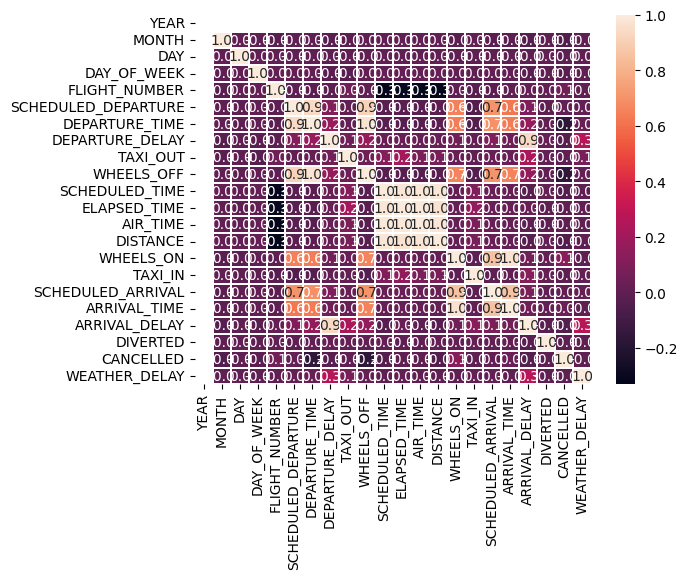

In [79]:
import seaborn as sn


correlacao = datasetSNulo.corr()
plot = sn.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.2)
plot

No gráfico de correlaçao podemos notar correlações fortes entre:
* Schedule time com elapsed time, air time, distance
* Elapsed time com air time, distance
* Air time com distance
* Wheels off e departure time
* Wheels on e arrival time

Análise univariada e bivariada

In [ ]:
target = "cancelled"
print('target:',target)

target: canceled


In [85]:
datasetSNulo[['CANCELLED']].value_counts(sort=False)

CANCELLED
0            5729195
1              75163
dtype: int64

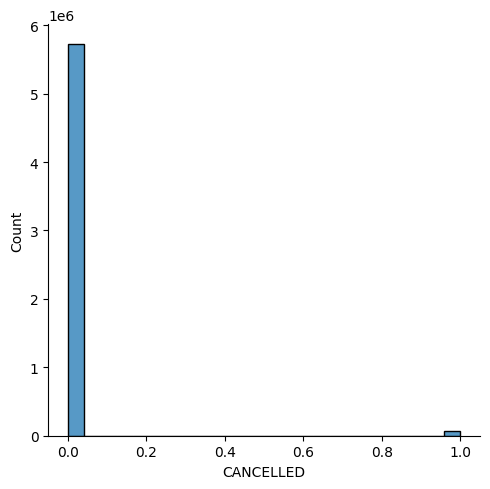

In [87]:
sns.displot(data=datasetSNulo, x="CANCELLED",kde=False)

In [88]:
datasetSNulo[['DIVERTED']].value_counts(sort=False)


DIVERTED
0           5789171
1             15187
dtype: int64

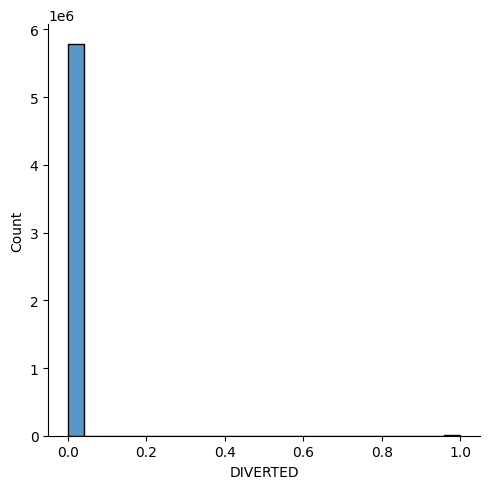

In [91]:
sns.displot(data=datasetSNulo, x="DIVERTED",kde=False)


### Criando um dataset com variaveis numericas

In [95]:
dfNumericos = datasetSNulo
dfNumericos.drop(columns=[])


In [100]:
dfNumericos = dfNumericos.drop(columns=['ORIGIN_AIRPORT','AIRLINE','TAIL_NUMBER','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','WHEELS_OFF','WHEELS_ON','SCHEDULED_ARRIVAL','ARRIVAL_TIME'])


In [101]:
dfNumericos

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY
0,2015,1,1,4,98,-11.0,21.0,205.0,194.0,169.0,1448,4.0,-22.0,0,0,0.0
1,2015,1,1,4,2336,-8.0,12.0,280.0,279.0,263.0,2330,4.0,-9.0,0,0,0.0
2,2015,1,1,4,840,-2.0,16.0,286.0,293.0,266.0,2296,11.0,5.0,0,0,0.0
3,2015,1,1,4,258,-5.0,15.0,285.0,281.0,258.0,2342,8.0,-9.0,0,0,0.0
4,2015,1,1,4,135,-1.0,11.0,235.0,215.0,199.0,1448,5.0,-21.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,688,-4.0,22.0,320.0,298.0,272.0,2611,4.0,-26.0,0,0,0.0
5819075,2015,12,31,4,745,-4.0,17.0,227.0,215.0,195.0,1617,3.0,-16.0,0,0,0.0
5819076,2015,12,31,4,1503,-9.0,17.0,221.0,222.0,197.0,1598,8.0,-8.0,0,0,0.0
5819077,2015,12,31,4,333,-6.0,10.0,161.0,157.0,144.0,1189,3.0,-10.0,0,0,0.0


array([[<AxesSubplot: title={'center': 'YEAR'}>,
        <AxesSubplot: title={'center': 'MONTH'}>,
        <AxesSubplot: title={'center': 'DAY'}>,
        <AxesSubplot: title={'center': 'DAY_OF_WEEK'}>],
       [<AxesSubplot: title={'center': 'FLIGHT_NUMBER'}>,
        <AxesSubplot: title={'center': 'DEPARTURE_DELAY'}>,
        <AxesSubplot: title={'center': 'TAXI_OUT'}>,
        <AxesSubplot: title={'center': 'SCHEDULED_TIME'}>],
       [<AxesSubplot: title={'center': 'ELAPSED_TIME'}>,
        <AxesSubplot: title={'center': 'AIR_TIME'}>,
        <AxesSubplot: title={'center': 'DISTANCE'}>,
        <AxesSubplot: title={'center': 'TAXI_IN'}>],
       [<AxesSubplot: title={'center': 'ARRIVAL_DELAY'}>,
        <AxesSubplot: title={'center': 'DIVERTED'}>,
        <AxesSubplot: title={'center': 'CANCELLED'}>,
        <AxesSubplot: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

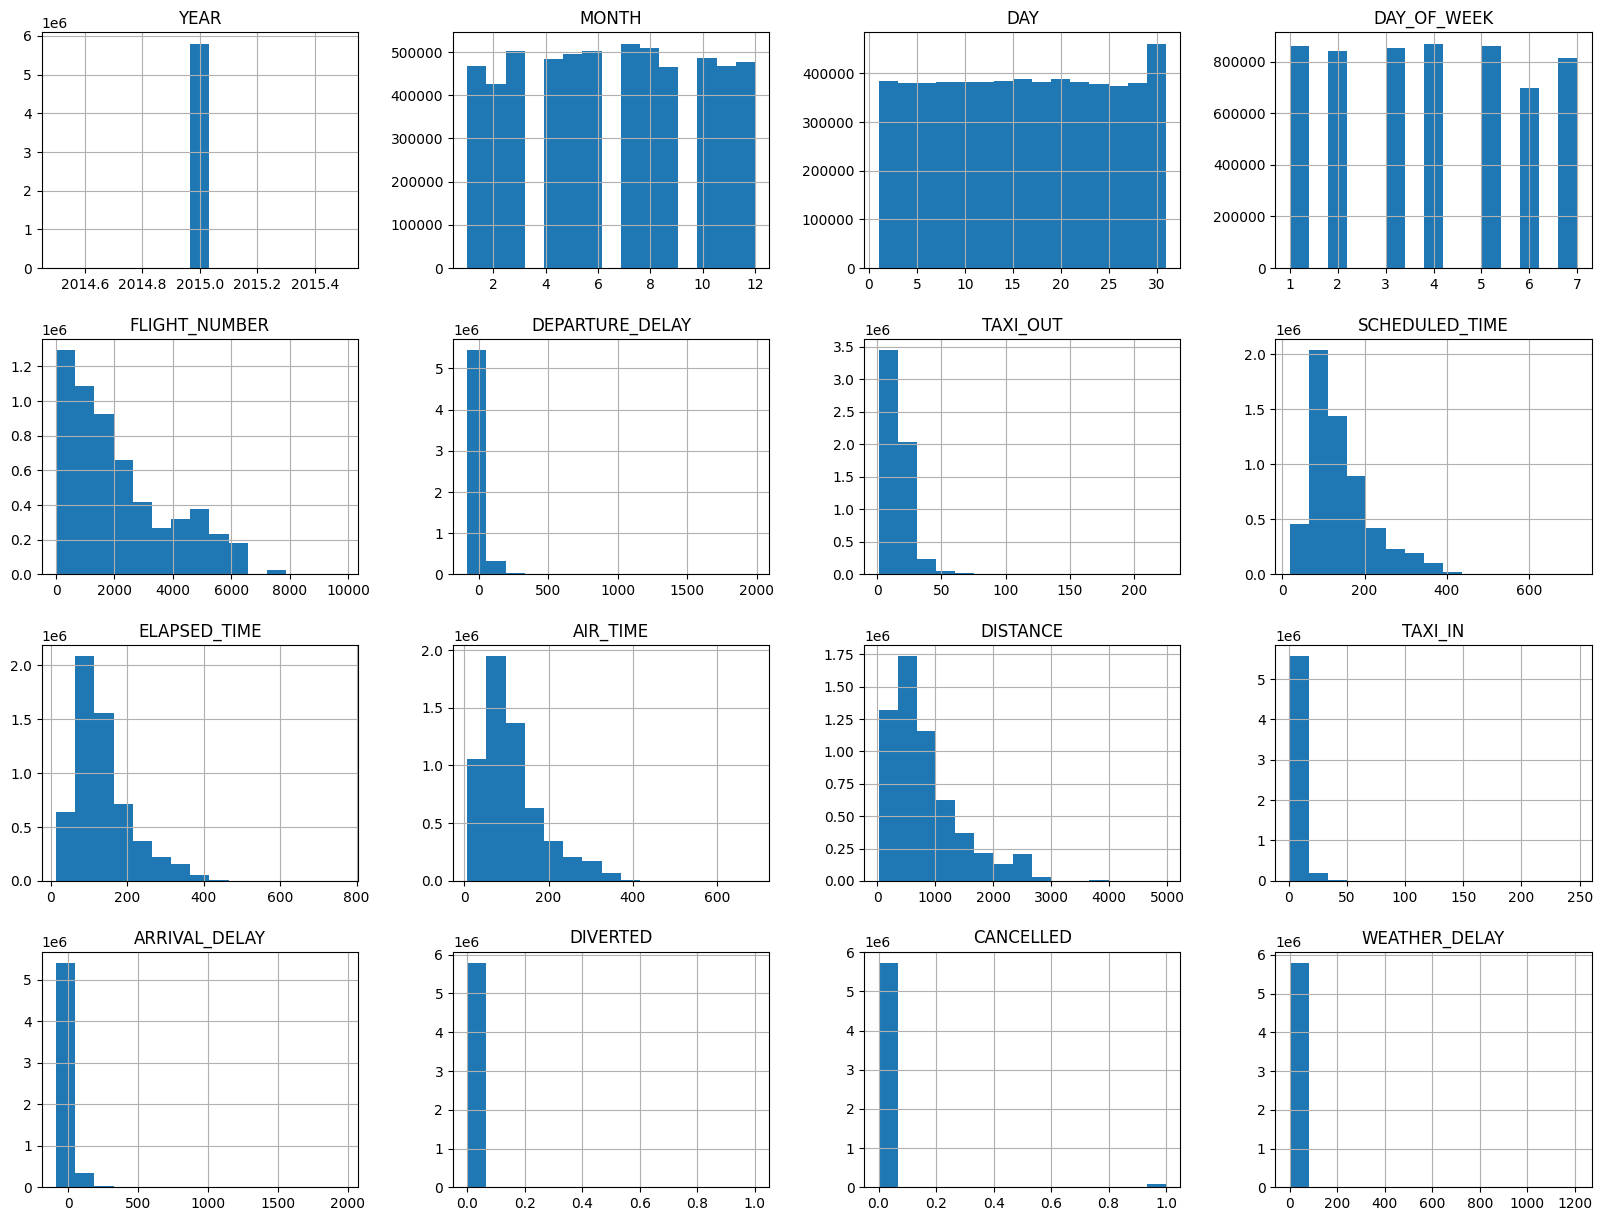

In [102]:
dfNumericos.hist(bins=15, figsize=(20,15))

### Plotagem de mais gráficos

<AxesSubplot: xlabel='SCHEDULED_TIME'>

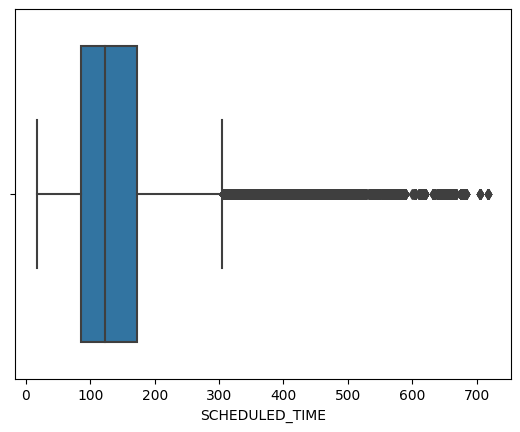

In [81]:
sns.boxplot(data=datasetSNulo, x='SCHEDULED_TIME')

<AxesSubplot: xlabel='SCHEDULED_ARRIVAL'>

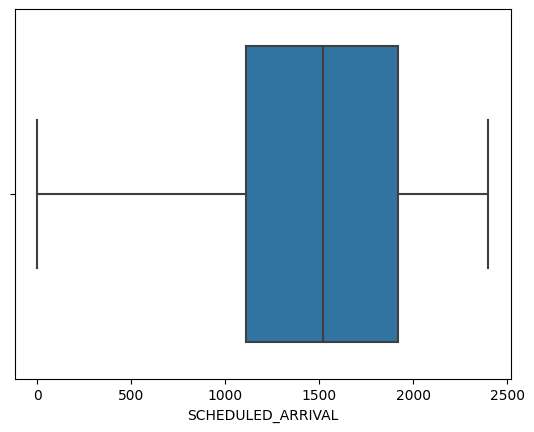

In [82]:
sns.boxplot(data=datasetSNulo, x='SCHEDULED_ARRIVAL')


<AxesSubplot: xlabel='SCHEDULED_DEPARTURE'>

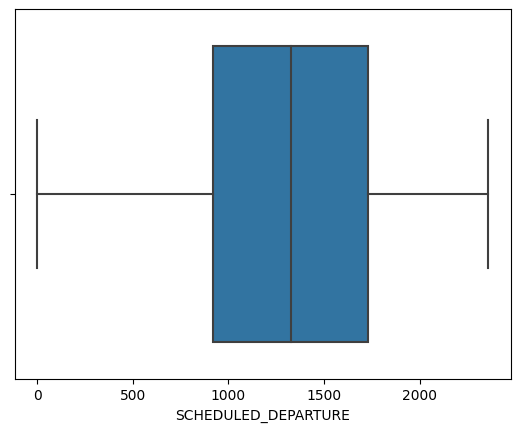

In [83]:
sns.boxplot(data=datasetSNulo, x='SCHEDULED_DEPARTURE')


### Aplicando aprendizagem da máquina

Separando entre treino e teste

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = dfNumericos.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32) 
scaled_features = StandardScaler().fit_transform(X_train,X_test)

Aplicando árvore de decisão

In [108]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier()

Fazendo predições e checando a acurácia

In [110]:
from sklearn.metrics import roc_auc_score

pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
# arrival dalay = negativo chegou adiantado, positivo atrasado
# motivo do atraso - variavel resposta 
